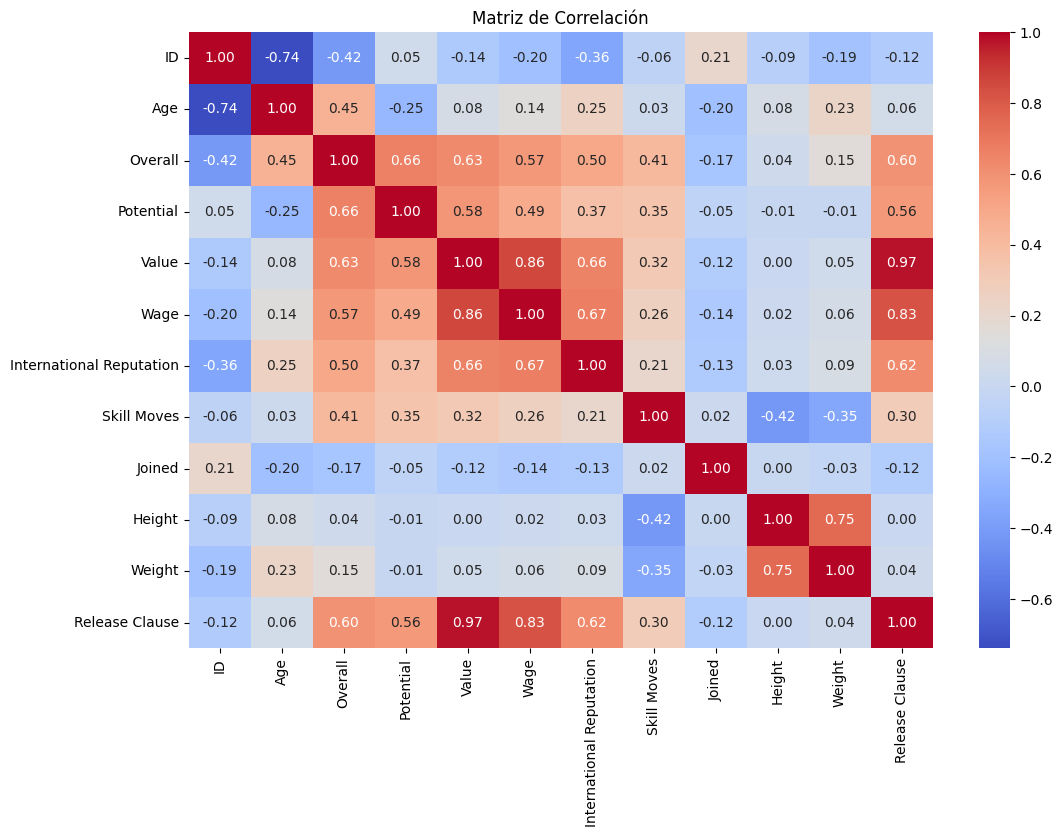

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause'] but received: age

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Leer el archivo CSV
df = pd.read_csv(r"C:\Users\chavs\Downloads\fifa_eda.csv")

# Filtrar solo columnas numéricas para la matriz de correlación
df_numeric = df.select_dtypes(include=['number'])

# Elemento 1: Matriz de correlación como heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Elemento 2: Gráfico de dispersión para ver relación entre Edad y Overall
fig = px.scatter(df, x='age', y='overall', title='Relación entre Edad y Overall', trendline='ols')
fig.show()

# Explicación: Se espera una relación positiva, pero en cierto punto la edad avanzada podría reducir el overall.

# Elemento 3: Gráfico de barras por club (número de jugadores)
df_club_counts = df['club'].value_counts().reset_index()
df_club_counts.columns = ['Club', 'Número de Jugadores']

plt.figure(figsize=(15, 6))
sns.barplot(data=df_club_counts.head(20), x='Club', y='Número de Jugadores', palette='viridis')
plt.xticks(rotation=90)
plt.title("Número de Jugadores por Club (Top 20)")
plt.show()

# Elemento 4: Gráfico multipanel de altura vs skill moves, segmentado por pierna hábil
fig = px.scatter(df, x='height_cm', y='skill_moves', facet_col='preferred_foot', color='overall',
                 title='Altura vs Skill Moves por Pierna Hábil')
fig.show()

# Elemento 5: Gráfico de estrellas emergentes (jugadores jóvenes con alto potencial)
df_young_talents = df[(df['age'] <= 21) & (df['potential'] >= 85)]
fig = px.scatter(df_young_talents, x='age', y='potential', color='overall',
                 size='value_eur', hover_data=['short_name', 'club'],
                 title='Jóvenes Talentos con Alto Potencial')
fig.show()
